In this demonstration, we collect the results of benchmark in a pandas data frame, and visualize it by seaborn library.

At first, we need to prepare requirements.

In [1]:
require 'nmatrix'
require 'numo/narray'

require 'pycall'

require 'pandas'
Pandas.options.display.max_rows = 20

require 'matplotlib/iruby'
Matplotlib::IRuby.activate

[:inline, "module://ruby.matplotlib.backend_inline"]

In [2]:
require 'benchmark'

N, L = 100, 10_000
ary = Array.new(L) { rand }
nma = NMatrix.new([L], ary)
nar = Numo::NArray[ary]

df = Pandas::DataFrame.new(data: {method: [], time: []})
N.times do |n|
  print "\r%3d / #{N}" % (n+1)
  $stdout.flush

  # Array#inject -------------------------
  t = Benchmark.realtime { ary.inject(:+) }
  df.loc[df.shape[0]] = { method: :inject, time: t }

  # while expr ---------------------------
  t = Benchmark.realtime {
    sum, i = ary[0], 1
    while i < L
      sum += ary[i]; i += 1
    end
  }
  df.loc[df.shape[0]] = { method: :while, time: t }

  # Array#sum ----------------------------
  t = Benchmark.realtime { ary.sum }
  df.loc[df.shape[0]] = { method: :ary_sum, time: t }

  # Enumerable#sum -----------------------
  enum = ary.each
  t = Benchmark.realtime { enum.sum }
  df.loc[df.shape[0]] = { method: :enum_sum, time: t }
  
  # NMatrix#sum --------------------------
  t = Benchmark.realtime { nma.sum }
  df.loc[df.shape[0]] = { method: :nmatrix, time: t }
  
  # Numo::NArray#sum ---------------------
  t = Benchmark.realtime { nar.sum }
  df.loc[df.shape[0]] = { method: :narray, time: t }
end
print " DONE\n"

(pry):13: warning: already initialized constant N
/usr/local/bundle/gems/nmatrix-0.2.3/lib/nmatrix/shortcuts.rb:1158: warning: previous definition of N was here


100 / 100 DONE


In [3]:
df

,method,time
0,inject,0.000729
1,while,0.000392
2,ary_sum,0.000074
3,enum_sum,0.000307
4,nmatrix,0.091117
5,narray,0.001878
6,inject,0.000396
7,while,0.000433
8,ary_sum,0.000060
9,enum_sum,0.000172


`groupby` method of a data frame is useful to calculate statistical summaries for each method of summation.

In [4]:
df.groupby(:method).describe

time                                                              \
          count      mean       std       min       25%       50%       75%   
method                                                                        
ary_sum   100.0  0.000057  0.000021  0.000040  0.000046  0.000049  0.000054   
enum_sum  100.0  0.000160  0.000046  0.000128  0.000132  0.000142  0.000157   
inject    100.0  0.000368  0.000112  0.000302  0.000303  0.000330  0.000381   
narray    100.0  0.000099  0.000195  0.000039  0.000045  0.000060  0.000076   
nmatrix   100.0  0.071863  0.008897  0.060303  0.064050  0.069874  0.077345   
while     100.0  0.000382  0.000075  0.000323  0.000332  0.000356  0.000393   

                    
               max  
method              
ary_sum   0.000172  
enum_sum  0.000331  
inject    0.000994  
narray    0.001878  
nmatrix   0.096516  
while     0.000665

And then, we can visualize the data frame by passing it to seaborn's function.

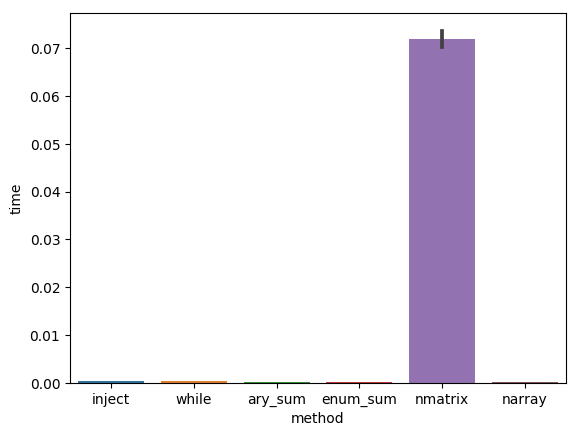

In [5]:
sns = PyCall.import_module('seaborn')
sns.barplot(x: 'method', y: 'time', data: df)

NMatrix's sum is too slow to compare with other methods, so let's visualize without nmatrix's bar to compare other methods.

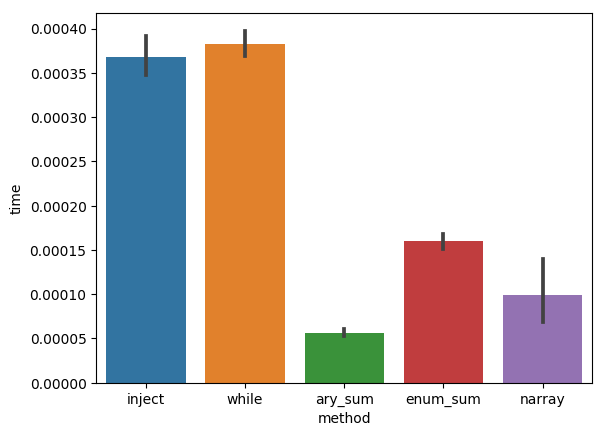

In [6]:
df_without_nmatrix = df[df[:method] != 'nmatrix']
sns.barplot(x: 'method', y: 'time', data: df_without_nmatrix)

This demonstration is finished.